#### Use Gradient Boosting Classifier on given dataset
- To Dermine the featureset impact on employee leaving the company
- Use Grid search with base estimator starting from 150-300 to determine the ideal no of estimator
- Draw the partial plot
- Dataset: HR_comma_sep.csv


In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_dataset = pd.read_csv('../data/HR_comma_sep.csv')
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
hr_dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
hr_dataset.rename(columns={'sales':'dept'}, inplace=True)

In [6]:
hr_dataset.salary.head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [7]:
X = hr_dataset.drop('left', axis = 1)
Y = hr_dataset['left']

In [8]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X[X.columns] = pd.DataFrame(scaler.fit_transform(X))

In [14]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
clf = GradientBoostingClassifier(n_estimators=80, random_state=400)

In [19]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [20]:
clf.score(X_test,y_test)

0.974

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
mod = GridSearchCV(clf, param_grid={'n_estimators':[60,80,100,120,140,160]})

In [23]:
mod.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=400),
             param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]})

In [24]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=160, random_state=400)

In [26]:
clf = GradientBoostingClassifier(n_estimators=160, random_state=400)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9743333333333334

In [27]:
clf.feature_importances_

array([5.42605861e-01, 9.87507037e-02, 1.14253186e-01, 7.42086956e-02,
       1.66362150e-01, 1.11344127e-03, 1.06925506e-04, 1.01338047e-04,
       1.22387807e-04, 8.47228502e-05, 3.08801164e-05, 5.33784404e-05,
       0.00000000e+00, 8.99324385e-05, 7.99401343e-06, 9.34317188e-05,
       2.88849992e-04, 6.12687452e-04, 1.11282520e-03, 6.08032336e-07])

In [28]:
feature_imp = pd.Series(clf.feature_importances_,index= X.columns)
feature_imp.sort_values(ascending = False)

satisfaction_level       5.426059e-01
time_spend_company       1.663621e-01
number_project           1.142532e-01
last_evaluation          9.875070e-02
average_montly_hours     7.420870e-02
Work_accident            1.113441e-03
salary_low               1.112825e-03
salary_high              6.126875e-04
dept_technical           2.888500e-04
dept_RandD               1.223878e-04
promotion_last_5years    1.069255e-04
dept_IT                  1.013380e-04
dept_support             9.343172e-05
dept_product_mng         8.993244e-05
dept_accounting          8.472285e-05
dept_management          5.337844e-05
dept_hr                  3.088012e-05
dept_sales               7.994013e-06
salary_medium            6.080323e-07
dept_marketing           0.000000e+00
dtype: float64

<AxesSubplot:>

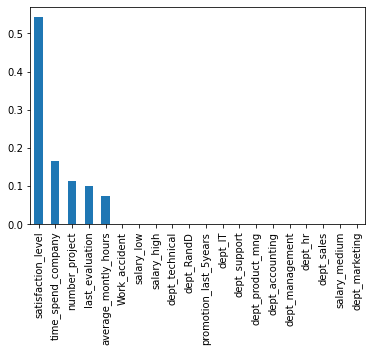

In [29]:
feature_imp.sort_values(ascending = False).plot(kind = 'bar')

In [36]:
from sklearn.inspection import plot_partial_dependence

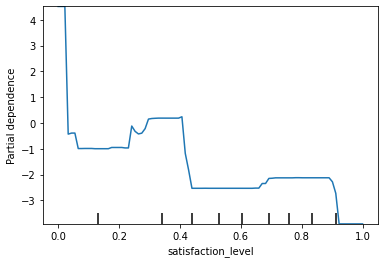

In [37]:
plot_partial_dependence(clf,X,[0],feature_names= X.columns.to_list())